### Import necessary libraires

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
pd.set_option('display.max_columns', None)
%matplotlib inline

In [41]:
os.chdir('E:\Data\IPL')

### Import The Data Set

In [42]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [43]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# EDA

In [44]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Converting the date column to date time and extracting the month and year from it and saving them in seperate columns

In [45]:
matches['date'] = pd.to_datetime(matches['date'])

In [46]:
matches['year'] = matches['date'].dt.year

In [47]:
matches['month'] = matches['date'].dt.month

In [48]:
matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,month
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,4
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,4
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,4
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,4


C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='toss_decision', ylabel='count'>

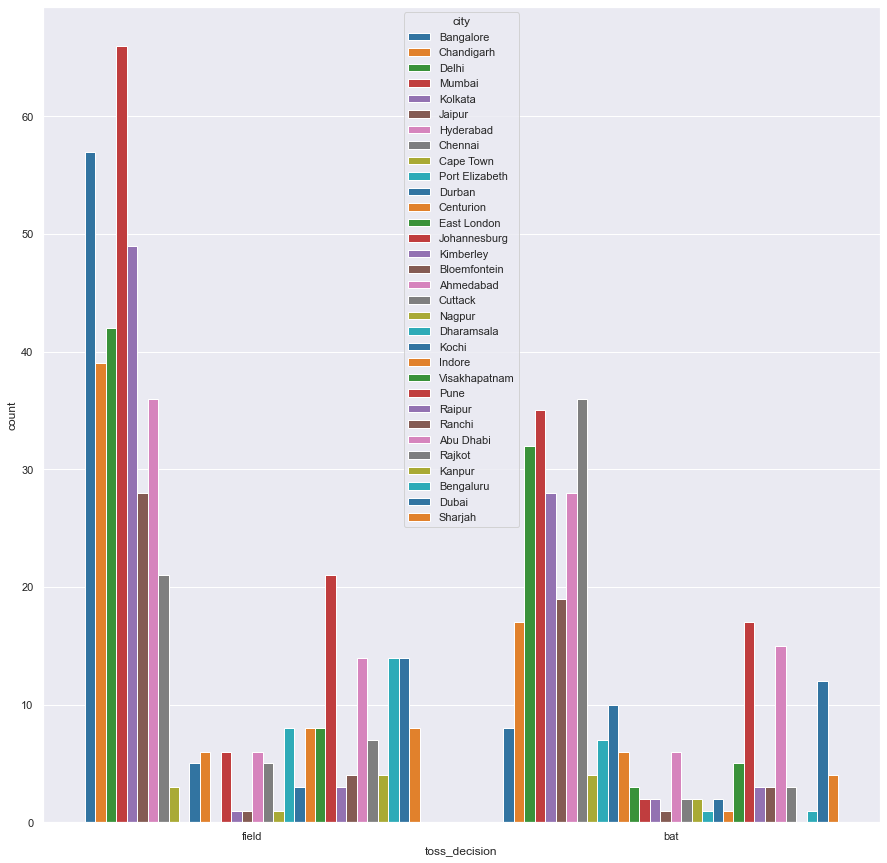

In [49]:
# Checking what the winner of toss will choose depending on the city where the match is being held
plt.figure(figsize = (15, 15))
sns.set_theme(style="darkgrid")
sns.countplot('toss_decision', data = matches, hue = 'city', palette = "tab10")

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='toss_decision', ylabel='count'>

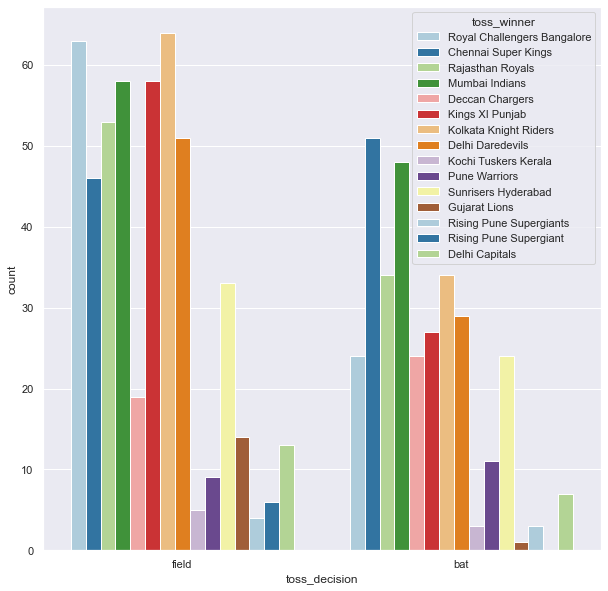

In [50]:
# Checking what the winner of toss will choose depending on the which team won the toss
plt.figure(figsize = (10, 10))
sns.set_theme(style="darkgrid")
sns.countplot('toss_decision', data = matches, hue = 'toss_winner', palette = "Paired")

# Lets check whether winner of the toss will win the match or not.

In [51]:
for i in range(len(matches)):
    if matches.loc[i, 'winner'] == matches.loc[i, 'toss_winner']:
        matches.loc[i, 'rel_1'] = 1
    else:
        matches.loc[i, 'rel_1'] = 0

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Rajasthan Royals'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Deccan Chargers'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Kochi Tuskers Kerala'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Rising Pune Supergiant'),
  Text(14, 0, 'Delhi Capitals')])

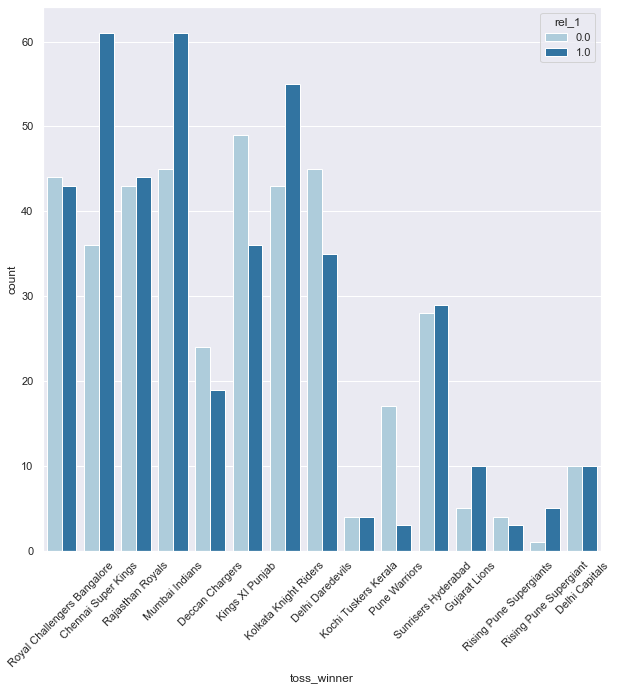

In [52]:
#Checking after winning the toss the team wins the match or loss it
plt.figure(figsize = (10, 10))
sns.set_theme(style="darkgrid")
sns.countplot('toss_winner', data = matches, hue = 'rel_1', palette = "Paired")
plt.xticks(rotation = 45)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='toss_decision', ylabel='count'>

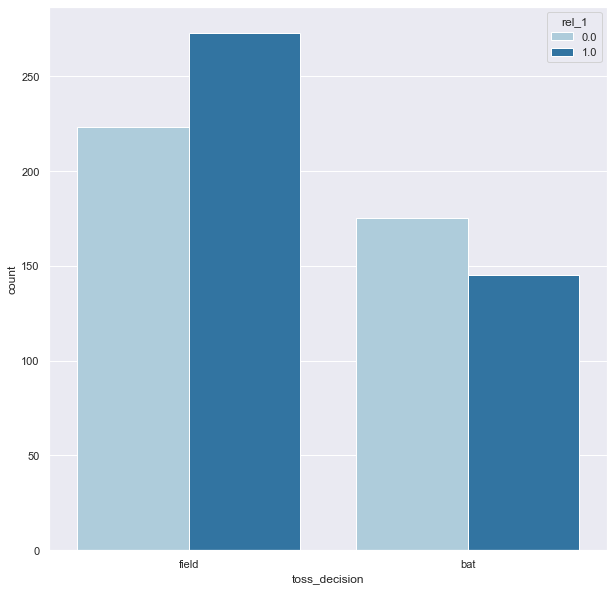

In [53]:
#From the below graph it is clearly visible that the the chances of winning are more if the team choose to do fielding after winning the toss
plt.figure(figsize = (10, 10))
sns.set_theme(style="darkgrid")
sns.countplot('toss_decision', data = matches, hue = 'rel_1', palette = "Paired")

In [54]:
most_playes_of_match = matches['player_of_match'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

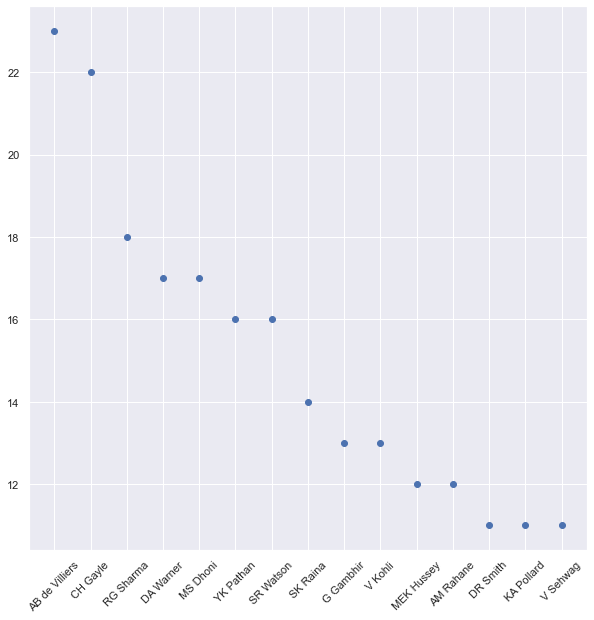

In [55]:
#Checking which Player has won most Player of the match award
plt.figure(figsize = (10, 10))
plt.plot(most_playes_of_match.nlargest(15), 'o')
plt.xticks(rotation = 45)

In [56]:
matches_played=pd.concat([matches['team1'],matches['team2']])

In [57]:
matches_played = matches_played.value_counts().reset_index()

In [58]:
matches_played.columns = ['Team', 'Matches Played']

In [59]:
won = matches['winner'].value_counts().reset_index()
won.columns = ['Team', 'Wins']

In [60]:
matches_played = matches_played.merge(won, right_index= True, left_index= True)

In [61]:
matches_played.drop(['Team_y'], axis = 1, inplace = True)

In [62]:
matches_played.columns = ['Team', 'Matches Played', 'Matches Win']

In [63]:
matches_played

,Team,Matches Played,Matches Win
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,106
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,91
4,Chennai Super Kings,178,88
5,Rajasthan Royals,161,81
6,Delhi Daredevils,161,67
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,19


In [64]:
matches_played['Matches Lost'] = matches_played['Matches Played'] - matches_played['Matches Win']

In [65]:
graph_1 = go.Bar(x = matches_played['Team'], y = matches_played['Matches Played'], name = 'Total Matches Played', marker=dict(color='red'),opacity=0.4)

graph_2 = go.Bar(x = matches_played['Team'], y = matches_played['Matches Win'], name = 'Total Matches won', marker=dict(color='blue'),opacity=0.4)

graph_3 = go.Bar(x = matches_played['Team'], y = (matches_played['Matches Win'])/matches_played['Matches Played']*100, name = 'Percent of Matches won', marker=dict(color='green'),opacity=0.4)
graph = [graph_1, graph_2, graph_3]

fig = go.Figure(data = graph)

In [66]:
#Checking for all the teams how many matches a team played and what number and percentage of matches the team won
iplot(fig)

In [67]:
graph_4 = [{'y' : matches_venue['venue'], 'x' : matches_venue['venue'].index, "marker": {"color": "lightblue", "size": 12},
         "line": {"color": "red","width" : 2,"dash" : 'dash'},
          "mode": "markers+lines", "name": "Women", "type": "scatter"}]

layout = {"title": "Stadiums Vs. Matches", 
          "xaxis": {"title": "Matches Played", }, 
          "yaxis": {"title": "Stadiums"},
          "autosize":False,"width":900,"height":700,"plot_bgcolor":"rgb(245,245,245)"}

fig = go.Figure(data = graph_4, layout = layout)

In [68]:
#Checking in which stadium most number of matches are played
iplot(fig)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year', ylabel='count'>

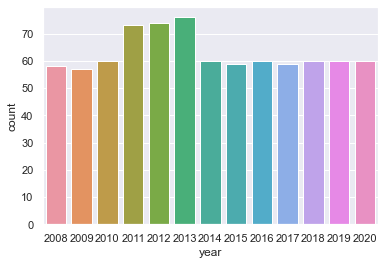

In [69]:
#Checking the year wise count of the total number of matches played
sns.countplot('year', data = matches)

C:\Users\chhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='month', ylabel='count'>

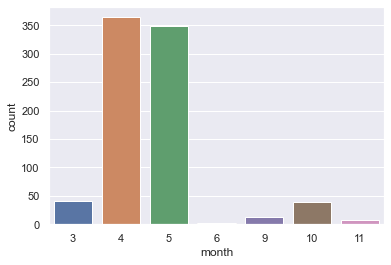

In [70]:
#Checking the month wise count of the total matches played 
sns.countplot('month', data = matches)

In [71]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [72]:
df_final = pd.merge(matches, deliveries, left_on = 'id', right_on = 'id')

In [73]:
df_final.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,month,rel_1,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4,0.0,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4,0.0,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4,0.0,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4,0.0,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,4,0.0,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [74]:
total_runs = df_final.groupby(['year'])['total_runs'].sum()

In [75]:
total_runs.reset_index()

,year,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


Text(0, 0.5, 'Total Runs')

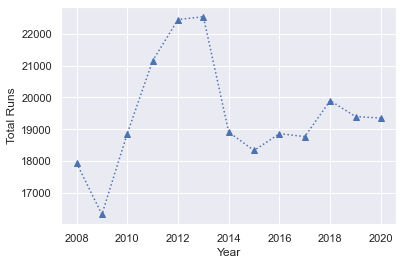

In [76]:
#Checking the year wise total score made in IPL
plt.plot(total_runs, '^:')
plt.xlabel('Year')
plt.ylabel('Total Runs')